# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [2]:
import sys
print(sys.path)


['/Users/staciesauer/GitHub/Python-API-Challenge/WeatherPy', '/Users/staciesauer/anaconda3/envs/dev/lib/python310.zip', '/Users/staciesauer/anaconda3/envs/dev/lib/python3.10', '/Users/staciesauer/anaconda3/envs/dev/lib/python3.10/lib-dynload', '', '/Users/staciesauer/anaconda3/envs/dev/lib/python3.10/site-packages', '/Users/staciesauer/anaconda3/envs/dev/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-macosx-10.9-x86_64.egg', '/Users/staciesauer/anaconda3/envs/dev/lib/python3.10/site-packages/aeosa']


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gewane
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | tateyama
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | nola
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | santa cruz cabralia
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | chokurdakh
Proce

Processing Record 35 of Set 4 | dakar
Processing Record 36 of Set 4 | vilyuysk
Processing Record 37 of Set 4 | yumen
Processing Record 38 of Set 4 | praia
Processing Record 39 of Set 4 | labutta
City not found. Skipping...
Processing Record 40 of Set 4 | minot
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | asau
Processing Record 43 of Set 4 | valparaiso
Processing Record 44 of Set 4 | roma
Processing Record 45 of Set 4 | verkhnevilyuysk
Processing Record 46 of Set 4 | bengkulu
Processing Record 47 of Set 4 | qabaqcol
Processing Record 48 of Set 4 | leon
Processing Record 49 of Set 4 | jalu
Processing Record 0 of Set 5 | santa cruz
Processing Record 1 of Set 5 | sergeyevka
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | chapais
Processing Record 4 of Set 5 | honningsvag
Processing Record 5 of Set 5 | sobolevo
Processing Record 6 of Set 5 | airai
Processing Record 7 of Set 5 | kathu
Processing Record 8 of Set 5 | dalian
Processing Record 9 of

City not found. Skipping...
Processing Record 29 of Set 8 | lahij
Processing Record 30 of Set 8 | mecca
Processing Record 31 of Set 8 | panama city
Processing Record 32 of Set 8 | tsiroanomandidy
Processing Record 33 of Set 8 | taoudenni
Processing Record 34 of Set 8 | aitape
Processing Record 35 of Set 8 | pareora
Processing Record 36 of Set 8 | batagay-alyta
Processing Record 37 of Set 8 | shakawe
Processing Record 38 of Set 8 | akdepe
Processing Record 39 of Set 8 | port hedland
Processing Record 40 of Set 8 | upernavik
Processing Record 41 of Set 8 | azimur
City not found. Skipping...
Processing Record 42 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 43 of Set 8 | kavaratti
Processing Record 44 of Set 8 | college
Processing Record 45 of Set 8 | safford
Processing Record 46 of Set 8 | agadez
Processing Record 47 of Set 8 | nyuksenitsa
Processing Record 48 of Set 8 | emba
Processing Record 49 of Set 8 | thessalon
Processing Record 0 of Set 9 | kathmandu
Processing

Processing Record 14 of Set 12 | kabanjahe
Processing Record 15 of Set 12 | stepnyak
Processing Record 16 of Set 12 | gobabis
Processing Record 17 of Set 12 | faya
Processing Record 18 of Set 12 | karamea
City not found. Skipping...
Processing Record 19 of Set 12 | manokwari
Processing Record 20 of Set 12 | saint pete beach
Processing Record 21 of Set 12 | mhlambanyatsi
Processing Record 22 of Set 12 | brigantine
Processing Record 23 of Set 12 | hirado
Processing Record 24 of Set 12 | hornepayne
Processing Record 25 of Set 12 | azare
Processing Record 26 of Set 12 | high level
Processing Record 27 of Set 12 | vao
Processing Record 28 of Set 12 | neiafu
Processing Record 29 of Set 12 | kemin
Processing Record 30 of Set 12 | challapata
Processing Record 31 of Set 12 | seydi
Processing Record 32 of Set 12 | zhirnov
Processing Record 33 of Set 12 | umm lajj
Processing Record 34 of Set 12 | lang suan
Processing Record 35 of Set 12 | yaguajay
Processing Record 36 of Set 12 | sinegorye
Proces

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gewane,10.1664,40.6453,85.82,50,15,4.56,ET,1712437973
1,narsaq,60.9167,-46.0500,34.02,72,100,1.39,GL,1712437734
2,vaini,-21.2000,-175.2000,80.76,69,40,14.97,TO,1712437735
3,albany,42.6001,-73.9662,45.03,67,100,4.00,US,1712437762
4,katsuura,35.1333,140.3000,57.22,93,99,9.98,JP,1712437975


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gewane,10.1664,40.6453,85.82,50,15,4.56,ET,1712437973
1,narsaq,60.9167,-46.0500,34.02,72,100,1.39,GL,1712437734
2,vaini,-21.2000,-175.2000,80.76,69,40,14.97,TO,1712437735
3,albany,42.6001,-73.9662,45.03,67,100,4.00,US,1712437762
4,katsuura,35.1333,140.3000,57.22,93,99,9.98,JP,1712437975


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

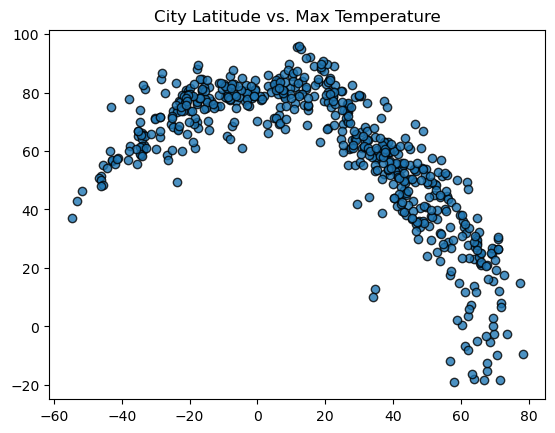

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("output_data/lattemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

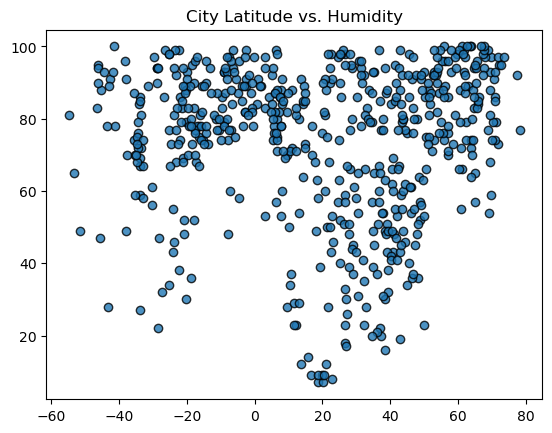

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/lathum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

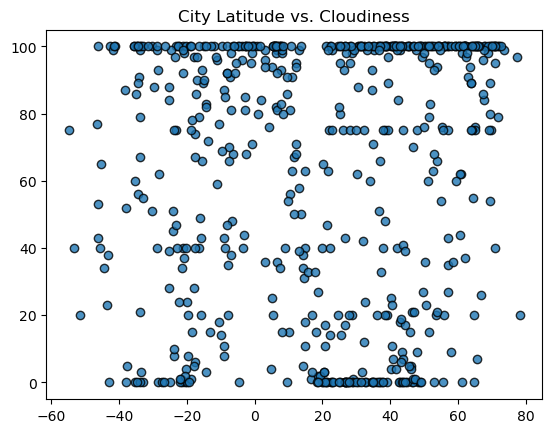

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/latcloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

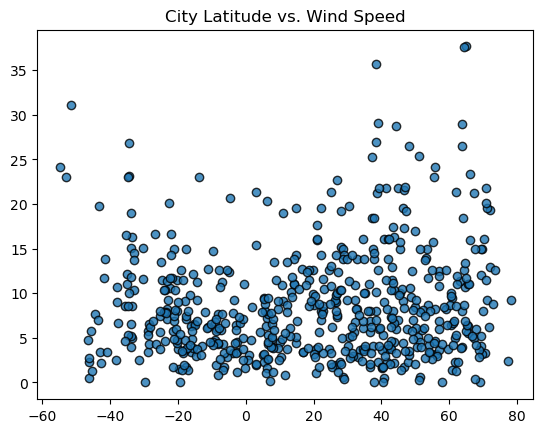

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/latwind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    from scipy.stats import linregress
    import matplotlib.pyplot as plt
    
    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"  # Equation of the line
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")  # Plot the regression line
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.xlabel('Latitude')
    plt.ylabel(title)
    
    # Print r-value
    print(f"The r-value is: {rvalue}")
    
    plt.show()
    
    return regress_values, slope, intercept  # Return regress_values, slope, and intercept


In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gewane,10.1664,40.6453,85.82,50,15,4.56,ET,1712437973
1,narsaq,60.9167,-46.0500,34.02,72,100,1.39,GL,1712437734
3,albany,42.6001,-73.9662,45.03,67,100,4.00,US,1712437762
4,katsuura,35.1333,140.3000,57.22,93,99,9.98,JP,1712437975
5,kapaa,22.0752,-159.3190,80.58,68,75,19.57,US,1712437828


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vaini,-21.2000,-175.2000,80.76,69,40,14.97,TO,1712437735
6,cape town,-33.9258,18.4232,66.11,59,21,18.99,ZA,1712437976
11,mataura,-46.1927,168.8643,51.58,95,53,0.51,NZ,1712437977
12,ushuaia,-54.8000,-68.3000,37.06,81,75,24.16,AR,1712437978
13,namibe,-15.1961,12.1522,74.86,74,89,6.60,AO,1712437979


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8763030060899237


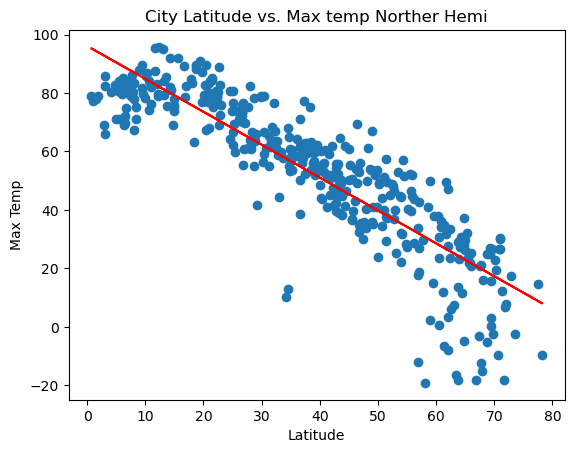

The slope equation is: y = -1.13x + 96.08


In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("City Latitude vs. Max temp Norther Hemi")
regress_values, slope, intercept = plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

# Get the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Print the slope equation
print(f"The slope equation is: {line_eq}")



The r-value is: 0.7329539884726126


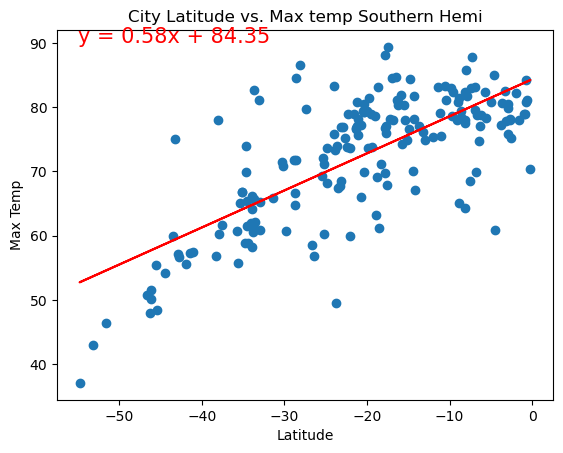

The slope equation is: y = 0.58x + 84.35


In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("City Latitude vs. Max temp Southern Hemi")
regress_values, slope, intercept = plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

# Get the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Print the slope equation
print(f"The slope equation is: {line_eq}")



**Discussion about the linear relationship:** with the r value at .73 that shows a positive relationship as it is close to 1. The slope line also shows a positive relationship. where decreasing latitude closer to the equator will increase max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24662956103442485


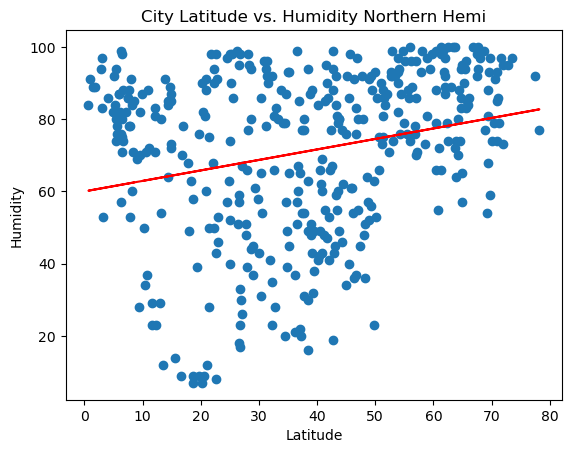

The slope equation is: y = 0.29x + 60.01


In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("City Latitude vs. Humidity Northern Hemi")
regress_values, slope, intercept = plot_linear_regression(x_values, y_values, 'Humidity', (-55, 90))

# Get the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Print the slope equation
print(f"The slope equation is: {line_eq}")


The r-value is: 0.2315391718334466


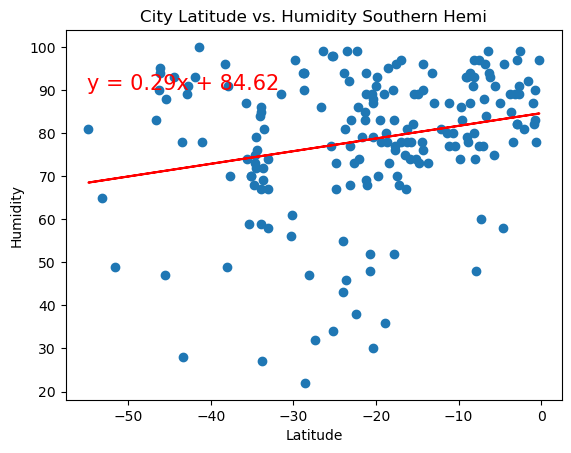

The slope equation is: y = 0.29x + 84.62


In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("City Latitude vs. Humidity Southern Hemi")
regress_values, slope, intercept = plot_linear_regression(x_values, y_values, 'Humidity', (-55, 90))

# Get the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Print the slope equation
print(f"The slope equation is: {line_eq}")



**Discussion about the linear relationship:** this is not as strong of a positive relationship as latitude and max temp since r value is only .23, still positive coorelation of latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16496440191075082


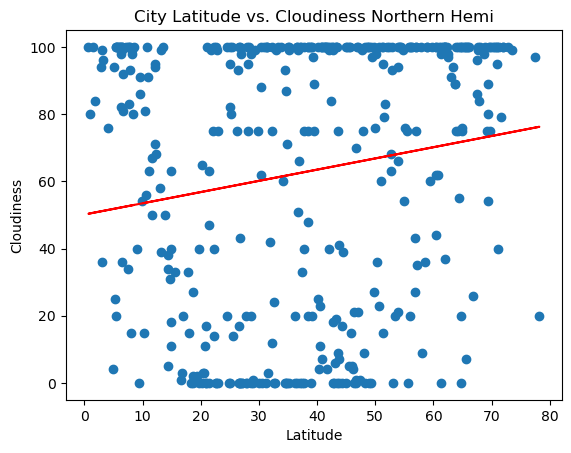

The slope equation is: y = 0.33x + 50.12


In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("City Latitude vs. Cloudiness Northern Hemi")
regress_values, slope, intercept = plot_linear_regression(x_values, y_values, 'Cloudiness', (-55, 90))

# Get the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Print the slope equation
print(f"The slope equation is: {line_eq}")


The r-value is: 0.1620560397417679


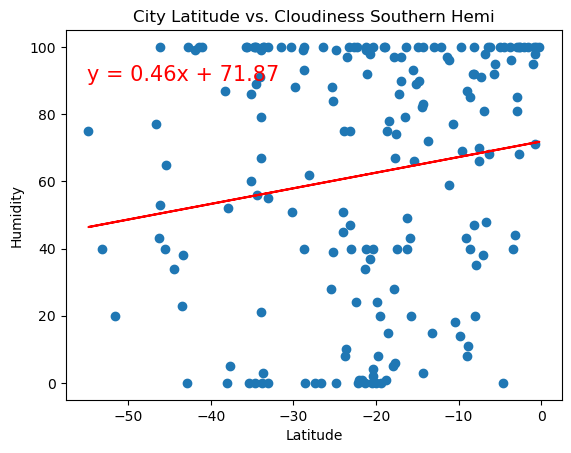

The slope equation is: y = 0.46x + 71.87


In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("City Latitude vs. Cloudiness Southern Hemi")
regress_values, slope, intercept = plot_linear_regression(x_values, y_values, 'Humidity', (-55, 90))

# Get the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Print the slope equation
print(f"The slope equation is: {line_eq}")

**Discussion about the linear relationship:** The relationship between cloudness and latitude is slightly positive, but only has an r value of .16, the lowest so far in positive relationships to latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14295593008698182


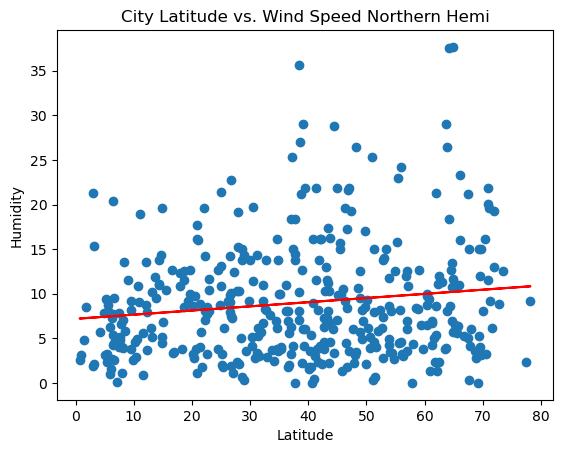

The slope equation is: y = 0.05x + 7.19


In [63]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("City Latitude vs. Wind Speed Northern Hemi")
regress_values, slope, intercept = plot_linear_regression(x_values, y_values, 'Humidity', (-65, 100))

# Get the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Print the slope equation
print(f"The slope equation is: {line_eq}")

The r-value is: -0.30407049939061537


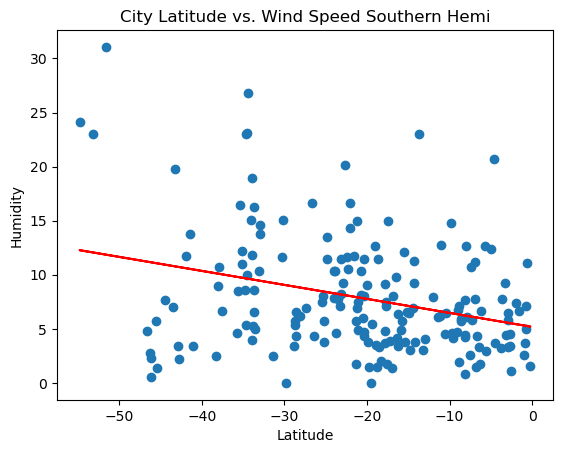

The slope equation is: y = -0.13x + 5.18


In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("City Latitude vs. Wind Speed Southern Hemi")
regress_values, slope, intercept = plot_linear_regression(x_values, y_values, 'Humidity', (-55, 90))

# Get the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Print the slope equation
print(f"The slope equation is: {line_eq}")

**Discussion about the linear relationship:** Oddly enough there is a positive correlation in the northern hemisphere related to wind speed and latitude, but a negative relationship in the southen hemisphere.

In [64]:
https://api.geoapify.com/v2/places?categories=accommodation.hotel&filter=circle:140.6833,41.8833,10000&bias=proximity:140.6833,41.88338&limit=20&apiKey=ed80708f26a54f8ea6cc620b5e047943

SyntaxError: invalid syntax (696420318.py, line 1)